# Question 3: Pen-Based Recognition of Handwritten Digits

In [1]:
import pandas as pd
import datetime 

In [2]:
cols=["At" +str(i) for i in range(1,17)]
cols.append("target")
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/penbased-5an-nn.csv", header=None)

df.columns=cols

df.head()

,At1,At2,At3,At4,At5,At6,At7,At8,At9,At10,At11,At12,At13,At14,At15,At16,target
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7


In [3]:
# Check missing values
df.isnull().any().sum() # No missing values

0

In [4]:
# Check data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   At1     10992 non-null  int64
 1   At2     10992 non-null  int64
 2   At3     10992 non-null  int64
 3   At4     10992 non-null  int64
 4   At5     10992 non-null  int64
 5   At6     10992 non-null  int64
 6   At7     10992 non-null  int64
 7   At8     10992 non-null  int64
 8   At9     10992 non-null  int64
 9   At10    10992 non-null  int64
 10  At11    10992 non-null  int64
 11  At12    10992 non-null  int64
 12  At13    10992 non-null  int64
 13  At14    10992 non-null  int64
 14  At15    10992 non-null  int64
 15  At16    10992 non-null  int64
 16  target  10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [5]:
# Check unique values of class 
df["target"].unique()

array([1, 9, 2, 5, 7, 0, 3, 6, 8, 4], dtype=int64)

In [6]:
# Count each unique value
df["target"].value_counts()# There is a pretty balance in each class

4    1144
2    1144
1    1143
0    1143
7    1142
6    1056
5    1055
3    1055
9    1055
8    1055
Name: target, dtype: int64

#### Features and target

In [7]:
X=df.iloc[:, 0:-1] # Get all columns except target variable
y=df["target"] # Get target variable

In [8]:
# Splitting dataset for training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=123)

#### Building models 

In [9]:
# Load classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
# Have a list of considered classifiers with default parameters (except for some where specified)
classifierLists=[LogisticRegression(multi_class='ovr', solver='liblinear'), DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),SVC(),KNeighborsClassifier(n_neighbors=5), MultinomialNB(),
                XGBClassifier(eval_metric='mlogloss'),GradientBoostingClassifier()]

In [11]:
# Considered overall accuracy 
meanTrainScore=[] # mean value of training accuracy
meanTestScore=[] # mean of test accuracy
absTrainTest=[] # Difference in training and testing accuracy
models=[] # Name of trained model
timeCost=[] # How much time does it take to train and test a model
def myMean(a):
    ketqua=sum(a)/len(a)
    return ketqua

for model in classifierLists:
    start_time=datetime.datetime.now()
    trainScore=[]
    testScore=[]
    absScore=[]
    for i in range(2, 20):

        X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=i)
        trainedModel=model.fit(X_train, y_train)
        train_score=trainedModel.score(X_train, y_train)
        trainScore.append(train_score)
        test_score=trainedModel.score(X_test, y_test)
        testScore.append(test_score)
        abs_score=abs(train_score-test_score)
        absScore.append(abs_score)
    meanTrainScore.append(myMean(trainScore))
    meanTestScore.append(myMean(testScore))
    absTrainTest.append(myMean(absScore))
    models.append(type(model).__name__)
    end_time=datetime.datetime.now()
    timelap=end_time-start_time
    timeCost.append(timelap)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [12]:
# Create a dataframe storing all metrics above
timeValue=[str(i)[2:10] for i in timeCost]
df_metrics=pd.DataFrame({"modelNames":models,"avgTrainScore":meanTrainScore,"AvgTestScore":meanTestScore,
                         "trainTestDifferent":absTrainTest, "timeTaken":timeValue})

df_metrics=df_metrics.sort_values(by="AvgTestScore", ascending=False)
# Reset index
df_metrics=df_metrics.reset_index(drop=True)
df_metrics

,modelNames,avgTrainScore,AvgTestScore,trainTestDifferent,timeTaken
0,RandomForestClassifier,1.000000,0.975396,0.024604,01:47.88
1,XGBClassifier,1.000000,0.974911,0.025089,01:04.47
2,GradientBoostingClassifier,0.998154,0.969796,0.028357,11:50.76
3,KNeighborsClassifier,0.973651,0.961588,0.012063,00:50.55
4,SVC,0.971629,0.960274,0.011355,00:45.23
5,DecisionTreeClassifier,1.000000,0.892366,0.107634,00:02.64
6,LogisticRegression,0.842613,0.838529,0.008114,00:36.80
7,MultinomialNB,0.769374,0.767912,0.008498,00:00.53


##### Choosing support vector machine model

In [13]:
# Split dataset for training and testing
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)
model=SVC()

model.fit(X_train, y_train)

SVC()

In [14]:
# Model accuracy
testScore=model.score(X_test, y_test)
trainScore=model.score(X_train, y_train)

print("Test accuracy: {:.4}%, Train accuracy: {:.4}%".format(testScore*100, trainScore*100))

Test accuracy: 96.65%, Train accuracy: 96.94%


In [15]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
print("Precision and Recall Metrics")
print(classification_report(y_test,y_pred))

Precision and Recall Metrics
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       285
           1       0.92      0.92      0.92       304
           2       0.95      0.94      0.95       288
           3       0.95      0.97      0.96       264
           4       0.98      1.00      0.99       289
           5       0.97      0.96      0.97       274
           6       0.98      0.99      0.99       259
           7       0.97      0.95      0.96       283
           8       0.98      0.98      0.98       253
           9       0.98      0.96      0.97       249

    accuracy                           0.97      2748
   macro avg       0.97      0.97      0.97      2748
weighted avg       0.97      0.97      0.97      2748



	   Confusion Matrix


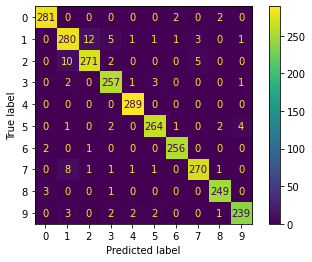

In [16]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
target_name=list(np.unique(y))
print("\t   Confusion Matrix")
cmPlot=plot_confusion_matrix(model,X_test, y_test, display_labels=target_name) # cmap=plt.cm.Blues,


### Select features 

In [17]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

bestFeat=SelectKBest(score_func=chi2, k="all")

bestFeat.fit(X,y)

dfFeat=pd.DataFrame({"Feature":X.columns,"Score":bestFeat.scores_})

dfFeat.sort_values(by="Score", ascending=False, inplace=True)
dfFeat.reset_index(drop=True, inplace=True)
dfFeat

,Feature,Score
0,At16,305065.184845
1,At14,206425.736559
2,At15,189564.186554
3,At1,151192.443321
4,At5,142008.079981
5,At11,131072.341089
6,At8,119738.460061
7,At10,112645.886772
8,At9,111050.554631
9,At12,108014.223275


In [18]:
# Get features with score>100000
bestList=[dfFeat.Feature[x] for x in range(len(dfFeat)) if dfFeat.Score[x]>68200]

bestList.sort()
X=X[bestList]

In [19]:
# Split dataset for training and testing
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)
model=SVC()

model.fit(X_train, y_train)
# Model accuracy
testScore=model.score(X_test, y_test)
trainScore=model.score(X_train, y_train)

print("Test accuracy: {:.4}%, Train accuracy: {:.4}%".format(testScore*100, trainScore*100))

Test accuracy: 93.6%, Train accuracy: 94.21%


- **Comments:** After fitting multiple models, there are some well-performing models (first five models). However, the SVC model was chosen for this dataset because its performance was high (~97%) and showed good stability (train-test accuracy difference ~1.2%)  with very least time. Selecting "best" features also conducted, but it is recommended to use all available features to have the highest accuracy. <br>
For other models, although Random Forest showed the highest test accuracy, it is quite overfitting (train-test difference ~2.5%) and its training time is far longer than SVC. It is also noted that KNN for this dataset considered good performance in both accuracy and time taking. 

## Conduct PCA (Dimentional Reduction)

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA(n_components=8)
pca1=pca.fit_transform(X)

df_pca=pd.DataFrame(pca1, columns=["PCA"+str(i) for i in range(1,9)])

df_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,-62.858223,-53.487262,55.776564,14.359972,11.007058,23.272131,-18.822835,20.743598
1,-94.463097,21.160111,-24.062969,-2.908780,51.947298,-15.298477,9.552494,5.126445
2,55.106089,-77.146697,22.111282,0.148888,10.871255,5.783493,19.583690,46.169279
3,138.485380,11.332684,47.468814,22.889847,-2.602581,27.683643,2.752703,-5.664371
4,56.106337,-55.545597,24.462860,-4.108769,-8.830750,-29.315569,0.835800,-8.634729
...,...,...,...,...,...,...,...,...
10987,-37.983213,68.941163,-66.427862,-8.416997,-9.153624,-43.111493,-5.536366,-9.166164
10988,54.953164,-42.552171,30.530105,-4.851546,-12.384257,-31.804037,5.686429,-12.018357
10989,-42.752373,-48.507525,9.726954,15.368258,-13.301703,9.296373,-28.590124,26.884336
10990,-76.564289,-33.023830,23.607432,35.343251,-21.216497,-17.371538,-9.367859,1.278880


In [22]:
sum_pca=pca.explained_variance_ratio_
print(sum_pca)

print("Eight PCA components summarised {:.4}% of orginal data".format(sum(sum_pca)*100))

[0.29414574 0.24265555 0.15227769 0.09789383 0.06600912 0.05531525
 0.02925145 0.02302955]
Eight PCA components summarised 96.06% of orginal data


## Refit SVC model with 8 PCA components

In [23]:
start_time=datetime.datetime.now()
# Split dataset for training and testing
X_train, X_test, y_train, y_test=train_test_split(df_pca,y, test_size=0.25, random_state=42)
model=SVC()

model.fit(X_train, y_train)
# Model accuracy
testScore=model.score(X_test, y_test)
trainScore=model.score(X_train, y_train)

print("Test accuracy: {:.4}%, Train accuracy: {:.4}%".format(testScore*100, trainScore*100))
end_time=datetime.datetime.now()

print("Time takes {}".format(end_time-start_time))

Test accuracy: 91.89%, Train accuracy: 92.5%
Time takes 0:00:02.353688


- **Comments**: After conducting PCA, there was a 4% reduction in test accuracy. For this small dataset, I believe that there is no need to conduct PCA since it takes less than 1 minute to complete. Conclusion: it is recommended to choose SVC with all features for this dataset.

# Question 2: Groceries dataset

In [24]:
df2=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/ItemList.csv", header=None)

df2.head()

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Create a list
import numpy as np
mlist=[]
for i in range(0, df2.shape[0]):
    mlist.append([str(df2.values[i,j]) for j in range(0, df2.shape[1])])
mlist[0]

['sausage',
 'whole milk',
 'semi-finished bread',
 'yogurt',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [26]:
# Import library
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [27]:
# Initializing TransactionEncoder
te=TransactionEncoder()
trans=te.fit(mlist).transform(mlist)
df_new=pd.DataFrame(trans, columns=te.columns_)
# Drop nan columns 
df_new=df_new.drop(['nan'], axis=1)
df_new.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


1. Áp dụng thuật toán (tự lựa chọn các tham số phù hợp cho thuật toán, lưu ý với số lượng transaction càng nhiều thì các ngưỡng nên đặt càng nhỏ). In kết quả. Vẽ biểu đồ.

In [148]:
# Calculate support

frequent_itemsets=apriori(df_new, min_support=0.0067, use_colnames=True)# Select only items presented 100 times or more in the dataset

frequent_itemsets.head()

,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)


In [150]:
# Get asociation rule table
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets, metric="lift", min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968
1,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
2,(whole milk),(bottled water),0.157923,0.060683,0.007151,0.045281,0.746196,-0.002432,0.983868
3,(bottled water),(whole milk),0.060683,0.157923,0.007151,0.117841,0.746196,-0.002432,0.954564
4,(citrus fruit),(whole milk),0.053131,0.157923,0.007151,0.134591,0.852259,-0.001240,0.973040
5,(whole milk),(citrus fruit),0.157923,0.053131,0.007151,0.045281,0.852259,-0.001240,0.991778
6,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
7,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
8,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219
9,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729


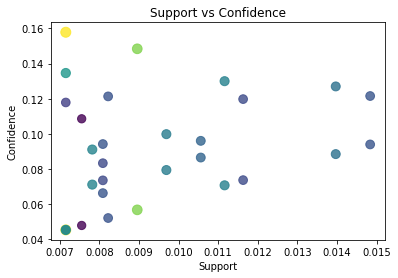

In [151]:
# Create a dataframe containing support, confidence and lift

df_rules=rules[["support","confidence","lift"]]

# Visualizing support and confidence

plt.scatter(df_rules.support, df_rules.confidence, s=df_rules.lift*100, alpha=0.8,c=df_rules.lift)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence")
plt.show()

2. Tìm kiếm thông tin từ kết quả: trong thông tin kết quả có 'sausage' không? Nếu có thì 'sausage' kết hợp với item nào?

In [158]:
for row in rules.iterrows():
    if "sausage" in row[1][0]:
        print(row)

(22, antecedents              (sausage)
consequents           (whole milk)
antecedent support       0.0603489
consequent support        0.157923
support                 0.00895542
confidence                0.148394
lift                      0.939663
leverage              -0.000575042
conviction                0.988811
Name: 22, dtype: object)


- Sausage combined with whole milk

3. Cho biết 15 sản phẩm được mua nhiều nhất. Vẽ biểu đồ.

In [159]:
# Calculate the number of present and non-present items
result=df_new.apply(pd.value_counts).fillna(0)
result

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
False,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903
True,60,320,22,29,3,4,121,17,508,326,...,80,51,277,654,8,359,175,2363,1285,60


In [175]:
df_true=pd.DataFrame({"Item": result.columns,"True":result.iloc[1,:]})

# Get top 15 products
df_true=df_true.sort_values(by=["True"], ascending=False)
df_true=df_true.reset_index(drop=True)
top15=df_true.iloc[0:15,:]
top15

,Item,True
0,whole milk,2363
1,other vegetables,1827
2,rolls/buns,1646
3,soda,1453
4,yogurt,1285
5,root vegetables,1041
6,tropical fruit,1014
7,bottled water,908
8,sausage,903
9,citrus fruit,795


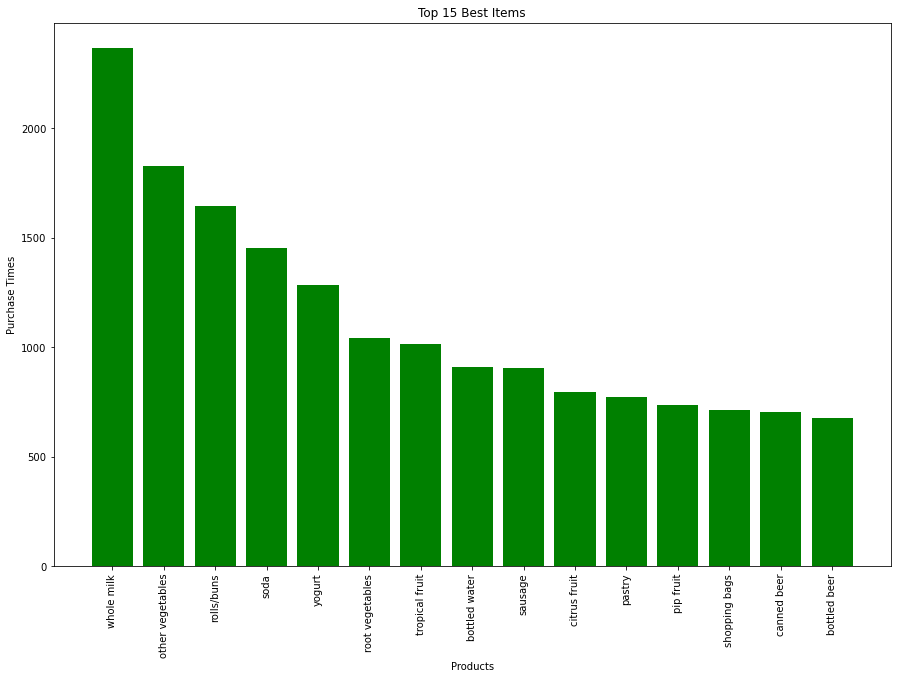

In [189]:
# Visualizing top 15 products
plt.figure(figsize=(15,10))
plt.bar(top15.Item, top15["True"], color="g")
plt.xlabel("Products")
plt.ylabel("Purchase Times")
plt.xticks(rotation="vertical")
plt.title("Top 15 Best Items")
plt.show()

4. Cho biết 15 sản phẩm được mua ít nhất. Vẽ biểu đồ

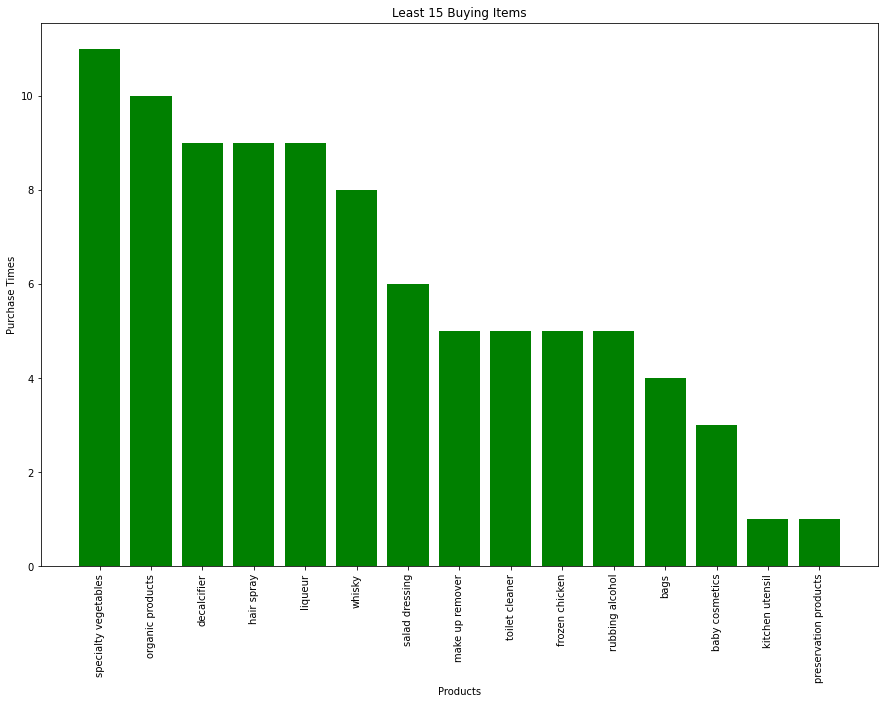

In [190]:
# Get least top 15 items
low15=df_true.iloc[-15:,:]

plt.figure(figsize=(15,10))
plt.bar(low15.Item, low15["True"], color="g")
plt.xlabel("Products")
plt.ylabel("Purchase Times")
plt.xticks(rotation="vertical")
plt.title("Least 15 Buying Items")
plt.show()

# Question 1: Clustering

In [35]:
import os

##### Read data and preprocessing text

In [146]:
import os
path=r"....\bbc"

content=[]
label=[]
totalChar=[] # Total characters in the paragraph (1 mẩu tin)
totalWord=[] # Total words (1 mẩu tin)

def mergeText(a):
    container=[]
    for i in a.readlines():
        container.append(i)
    newText=" ".join(container)
    myText=re.sub('[^a-zA-Z]',' ',newText)
    mlist=myText.split()
    mlist=" ".join(mlist)
    return mlist
       
def letterCount(a):
    total=[]
    for i in a:
        if i.isalpha():
            total.append(i)
    length=len(total)
    return length
def wordCount(a):
    ketqua=list(a.split())
    length=len(ketqua)
    return length
 
for folder in os.listdir(path):
    folderPath=os.path.join(path,folder)
    files=os.listdir(folderPath)
    for eachfile in files:
        filePath=os.path.join(folderPath,eachfile)
        readText=open(filePath, "r")
        text=mergeText(readText)
        content.append(text)
        label.append(folder)
        totalChar.append(letterCount(text))
        totalWord.append(wordCount(text))    

In [147]:
# Create a dataframe storing variables 
df=pd.DataFrame({"Content":content,"Label":label, "totalChar":totalChar,"totalWord":totalWord})

df["avgWord"]=df.totalChar/totalWord # Average word

df.head()
#df.to_csv("Textfile.csv")

,Content,Label,totalChar,totalWord,avgWord
0,Ad sales boost Time Warner profit Quarterly pr...,business,1982,421,4.707838
1,Dollar gains on Greenspan speech The dollar ha...,business,1795,393,4.567430
2,Yukos unit buyer faces loan claim The owners o...,business,1234,269,4.587361
3,High fuel prices hit BA s profits British Airw...,business,1817,395,4.600000
4,Pernod takeover talk lifts Domecq Shares in UK...,business,1221,266,4.590226


### Using CountVecterizer

In [148]:
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
cv=CountVectorizer(min_df=0.1, max_df=0.8)
cv.fit(df.Content)

CountVectorizer(max_df=0.8, min_df=0.1)

In [150]:
df_transform=cv.transform(df.Content)

In [151]:
df_transform = pd.DataFrame(df_transform.toarray(), columns=cv.get_feature_names()).add_prefix('count_')
df_transform

,count_able,count_about,count_according,count_action,count_added,count_after,count_again,count_against,count_ahead,count_all,...,count_win,count_without,count_won,count_work,count_world,count_would,count_year,count_years,count_yet,count_you
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,4,0,0,0
1,0,3,0,0,0,2,0,2,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,2,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,1,6,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,1,2,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2221,0,2,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2222,0,5,1,1,0,3,0,2,0,3,...,0,1,0,0,1,1,2,0,1,5
2223,0,4,0,1,0,1,0,3,0,0,...,0,0,0,3,0,0,2,0,0,0


In [152]:
# Select K=5
model=KMeans(n_clusters=5).fit(df_transform)
centroids=model.cluster_centers_
labels=model.labels_


df["Group"]=pd.Series(labels)

df.head(15)

,Content,Label,totalChar,totalWord,avgWord,Group
0,Ad sales boost Time Warner profit Quarterly pr...,business,1982,421,4.707838,1
1,Dollar gains on Greenspan speech The dollar ha...,business,1795,393,4.567430,1
2,Yukos unit buyer faces loan claim The owners o...,business,1234,269,4.587361,1
3,High fuel prices hit BA s profits British Airw...,business,1817,395,4.600000,1
4,Pernod takeover talk lifts Domecq Shares in UK...,business,1221,266,4.590226,1
5,Japan narrowly escapes recession Japan s econo...,business,958,184,5.206522,1
6,Jobs growth still slow in the US The US create...,business,1300,279,4.659498,1
7,India calls for fair trade rules India which a...,business,1526,323,4.724458,1
8,Ethiopia s crop production up Ethiopia produce...,business,1164,216,5.388889,1
9,Court rejects bn tobacco case A US government ...,business,1152,222,5.189189,1


<AxesSubplot:xlabel='Label', ylabel='count'>

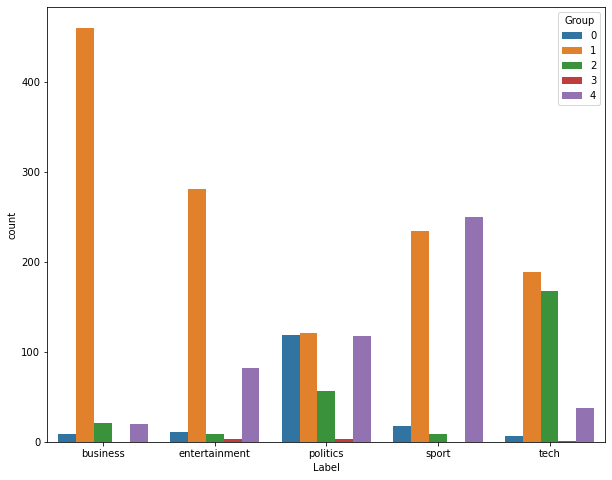

In [153]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(data=df, x="Label", hue="Group")

- The accuracy (in the barplot) seems not very good. Alternatively we can apply tf idf.

#### TF-IDF method

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=400, stop_words='english')
df_transform1 = tv.fit_transform(df['Content']).toarray()

df_transform1 = pd.DataFrame(df_transform1, columns=tv.get_feature_names()).add_prefix('TFIDF_')
df_transform1.shape

(2225, 400)

In [164]:
# Select K=5
model=KMeans(n_clusters=5).fit(df_transform1)
centroids=model.cluster_centers_
labels=model.labels_


df["Group"]=pd.Series(labels)

df.head(15)

,Content,Label,totalChar,totalWord,avgWord,Group
0,Ad sales boost Time Warner profit Quarterly pr...,business,1982,421,4.707838,3
1,Dollar gains on Greenspan speech The dollar ha...,business,1795,393,4.567430,3
2,Yukos unit buyer faces loan claim The owners o...,business,1234,269,4.587361,3
3,High fuel prices hit BA s profits British Airw...,business,1817,395,4.600000,3
4,Pernod takeover talk lifts Domecq Shares in UK...,business,1221,266,4.590226,3
5,Japan narrowly escapes recession Japan s econo...,business,958,184,5.206522,3
6,Jobs growth still slow in the US The US create...,business,1300,279,4.659498,3
7,India calls for fair trade rules India which a...,business,1526,323,4.724458,3
8,Ethiopia s crop production up Ethiopia produce...,business,1164,216,5.388889,0
9,Court rejects bn tobacco case A US government ...,business,1152,222,5.189189,3


<AxesSubplot:xlabel='Label', ylabel='count'>

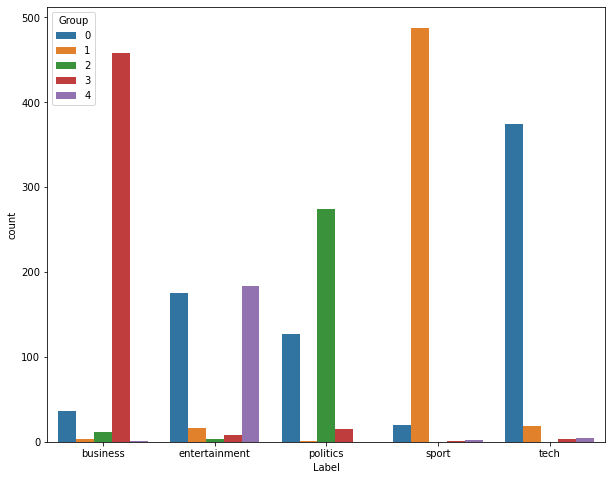

In [166]:
# Visualizing the group
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(data=df, x="Label", hue="Group") # As we can observed that 3 is more likely to fall in business label.

In [177]:
# Accuracy assessment 
label={3:"business", 4:"entertainment", 2:"politics",1:"sport",0:"tech"}

df["labelEncode"]=df.Group.replace(label)

from sklearn.metrics import accuracy_score, classification_report

overallAccuracy=accuracy_score(df.Label, df.labelEncode)

classAccuracy=classification_report(df.Label, df.labelEncode)
print( "Overall accuracy is",overallAccuracy*100,"%")

Overall accuracy is 79.95505617977528 %


In [179]:
print(classAccuracy)

               precision    recall  f1-score   support

     business       0.94      0.90      0.92       510
entertainment       0.96      0.48      0.64       386
     politics       0.95      0.66      0.78       417
        sport       0.93      0.95      0.94       511
         tech       0.51      0.94      0.66       401

     accuracy                           0.80      2225
    macro avg       0.86      0.78      0.79      2225
 weighted avg       0.87      0.80      0.80      2225



- Final comment: KMeans model with TFIDF provided a quite good accuracy (80%) for this text dataset. 